# [Capstone Project] ML for Healthcare - Instruction and example




## Introduction

### Rule to complete the assignment
The basic rule is to write down your code after Each **TODO** line. There's **no limitation** on what libraries you use, how many lines code you write, how many cells you use in JupyterNotebook, etc.

### Grading
The grade will be given based on the performance of your model on a testing dataset. Note, this **testing dataset** is private to the instructor and TA. As a student, you don't have access to the test dataset. What you can do is to refine or polish your model based on the **training** and **validation** set. Submit the best model you have.

# Overview
In this hands-on lab session, we will delve into the practical application of Artificial Intelligence within the field of healthcare.
This lab will include:
- Dataset introduction
- Preprocessing
- Problem definition
- Feature engineering
- Model selection
- Training the model
- Validation and hyperparameter tuning
- Evaluation metrics


## Dataset introduction
For this lab, we will take one ECG dataset as example from the UCR Time Series Classification Archive.

### **UCR Time Series Classification Archive**  
Maintained by the University of California, Riverside (UCR), it is a valuable resource and repository for time series data and related classification problems. This archive is a comprehensive collection of various time series datasets designed specifically for benchmarking and evaluating time series classification algorithms and methods.
FYI, the whole UCR raw data download link: https://www.cs.ucr.edu/%7Eeamonn/time_series_data_2018/

But in this lab, you don't need it. **Please download the ECG5000 dataset on Canvas under the module of [Lab] Applied AI in Healthcare.**

### **ECG5000**  
> The original data set for *ECG5000* is a 20-hour long ECG downloaded from Physionet_ATM [1]. The database is BIDMC Congestive Heart Failure Database(chfdb) and the record is chf07. It was originally published by Goldberger et al. [2]. The data were pre-processed in two steps, first extracting each heartbeat and then making each heartbeat equal length using interpolation. These data were originally used by Chen et al. [3]. After that, 5000 heartbeats were randomly selected to make the current data set. Data were from a patient who has severe congestive heart failure. The class values were obtained by automated annotation.

>[1] https://physionet.org/cgi-bin/atm/ATM  
>[2] Goldberger, Ary L., et al. "PhysioBank, PhysioToolkit, and PhysioNet: components of a new research resource for complex physiologic signals." Circulation 101.23 (2000): e215-e220.  
>[3] Chen, Yanping, et al. "A general framework for never-ending learning from time series streams." Data Mining and Knowledge Discovery 29.6 (2015): 1622-1664.  
>[4] http://www.timeseriesclassification.com/description.php?Dataset=ECG5000

|                 Class name                 | Abbreviation | # of Samples |
|:------------------------------------------:|:------------:|:------------:|
|                   Normal                   |       N      |              |
|  R-on-T premature ventricular contraction  |       r      |              |
| Supraventricular premature or ectopic beat |       S      |              |
|      Premature ventricular contraction     |       V      |              |
|             Unclassifiable beat            |       Q      |              |

## TODO 1 Load the dataset

0. Download the ECG5000 dataset on Canvas under the module of [Lab] Applied AI in Healthcare. Put the folder at the same path as your Jupyter code (aka, this file). In other words, th path should be *ECG5000/ECG500_assignment.tsv* when loading the data in this file.

1. Load the *ECG500_assignment.tsv* file, save the file into variable *ECGdataset*.

2. Print out the first Sample, only the first sample.

3. What the value of the first feature of the 10-th sample? Print it out.











<span style="color:red">**❗Note: here I use a different dataset of ECG (MIT-BIH) to demostrate the how to do these steps.**</span>

In [ ]:
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
# Load data
ecg_data = pickle.load(open('../ITCS_5153/ECG_data/MIT_BIH_data_5class.p', "rb"), encoding='latin1')

In [ ]:
# Check data shape, the data shape we see here include the column of label
# label: the 481-th column is disease, the 482-th is subject
ecg_data.shape

(103398, 482)

In [ ]:
# Get the first sample
first_sample = ecg_data[0]
first_sample

array([ -50.,  -49.,  -49.,  -50.,  -51.,  -54.,  -58.,  -61.,  -62.,
        -61.,  -61.,  -62.,  -62.,  -62.,  -59.,  -60.,  -64.,  -65.,
        -65.,  -64.,  -61.,  -58.,  -59.,  -58.,  -61.,  -59.,  -57.,
        -59.,  -59.,  -60.,  -61.,  -57.,  -57.,  -56.,  -57.,  -58.,
        -59.,  -59.,  -56.,  -55.,  -53.,  -51.,  -52.,  -49.,  -47.,
        -47.,  -48.,  -48.,  -51.,  -50.,  -49.,  -49.,  -51.,  -52.,
        -53.,  -52.,  -54.,  -55.,  -58.,  -60.,  -61.,  -62.,  -61.,
        -58.,  -57.,  -60.,  -60.,  -59.,  -57.,  -57.,  -56.,  -58.,
        -61.,  -60.,  -60.,  -61.,  -63.,  -67.,  -69.,  -68.,  -66.,
        -65.,  -65.,  -66.,  -65.,  -63.,  -60.,  -61.,  -63.,  -67.,
        -67.,  -65.,  -62.,  -61.,  -64.,  -66.,  -66.,  -62.,  -61.,
        -62.,  -64.,  -67.,  -66.,  -63.,  -61.,  -53.,  -48.,  -42.,
        -38.,  -34.,  -26.,  -16.,    1.,   20.,   37.,   61.,   86.,
        116.,  141.,  153.,  167.,  178.,  174.,  150.,  115.,   75.,
         30.,   -6.,

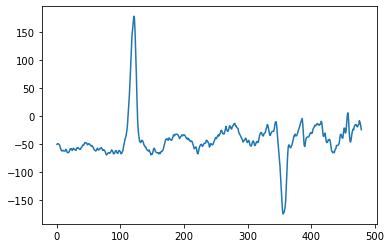

In [ ]:
# Visualize the first sample's feature
fig, ax = plt.subplots()
ax.plot(first_sample[:480])

plt.show()

In [ ]:
# Get the value of the first feature of the 10-th sample
sample_10th_feature = ecg_data[9][:480]
sample_10th_feature[0]

-52.0

In [ ]:
# Here we split the features and labels to facilitate the next step
ecg_feature = ecg_data[:, 0:480]

# We only take the disease label (481-th column) in this example
ecg_label = ecg_data[:, 480:481]

print(f"Feature shape: {ecg_feature.shape}, Label shape: {ecg_label.shape}")

Feature shape: (103398, 480), Label shape: (103398, 1)


## TODO 2 Preprocessing

1. Normalize each sample (features) following the time-dimention, using the *sklearn.preprocessing.StandardScaler* function. Please remember to install and import the *sklearn* library.

<span style="color:red">**❗Note: Recall that the dataset feature shape we used for this example: (103398, 480), which means (number_of_samples, number_of_features), so the time-dimention is the direction of the number_of_features.**</span>

In [ ]:
scaler = StandardScaler()
ecg_data_normalized = scaler.fit_transform(ecg_feature)

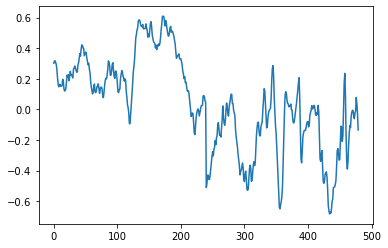

In [ ]:
# Visualize the first sample's feature again
first_sample_feature = ecg_data_normalized[0]

fig, ax = plt.subplots()
ax.plot(first_sample_feature)

plt.show()

## TODO 3 Data Splitting

1. Randomly split the dataset into two parts and name them as *Training_set* and *Validation_set* . The training set takes 60% while the validation takes the remaining 40%.

2. Set the random seed as *42*.

In [ ]:
# For this step, we need to use "train_test_split" function from the scikit-learn library
# here you can treat the validation set as test set in the "train_test_split" function

X_train, X_val, y_train, y_val = train_test_split(ecg_data_normalized, ecg_label, test_size=0.4, random_state=42)

In [ ]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}\n"
      f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

X_train shape: (62038, 480), y_train shape: (62038, 1)
X_val shape: (41360, 480), y_val shape: (41360, 1)


In [ ]:
X_train_s = X_train[:10000,:]

In [ ]:
y_train_s = y_train[:10000,:]

In [ ]:
X_val_s = X_val[:4000,:]
y_val_s = y_val[:4000,:]

## TODO 4 Train a KNN classifier

1. Use Sklearn library, train a KNN classifier (set K equals to *5*), feed the *Training_set* to the classifier.

<span style="color:red">**❗Note: here I will use a different classifier for this example.**</span>

In [ ]:
y_train_flat = y_train_s.reshape(-1)
y_val_flat = y_val_s.reshape(-1)

In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, probability=True, decision_function_shape='ovr')

# Train the SVM classifier
svm_classifier.fit(X_train_s, y_train_flat)

SVC(kernel='linear', probability=True)

## TODO 5 Validate the classifier

1. Use the trained classifier to predict the classes of the *Validation_set* .

2. Print out the Accuracy, Precision, Recall, F1 score, AUROC, confusion matrix. For the matrix (except confusion matrix), keep 4 digits (such as 0.9856).

3. Create a list, named *model_performance_knn* with 5 elements, which are Accuracy, Precision, Recall, F1 score, AUROC, respectively. Create a numpy array named *cf_matrix* to store the confusion matrix.



In [ ]:
# Make predictions on the Validation_set
y_pred = svm_classifier.predict(X_val_s)
y_prob = svm_classifier.predict_proba(X_val_s)

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_val_flat, y_pred)
precision = precision_score(y_val_flat, y_pred, average='macro')
recall = recall_score(y_val_flat, y_pred, average='macro')
f1 = f1_score(y_val_flat, y_pred, average='macro')
auroc = roc_auc_score(y_val_flat, y_prob, average='macro', multi_class='ovr')
conf_matrix = confusion_matrix(y_val_flat, y_pred)

In [ ]:
print("Accuracy: {:.4f}".format(accuracy))
print("Precision (macro): {:.4f}".format(precision))
print("Recall (macro): {:.4f}".format(recall))
print("F1 Score (macro): {:.4f}".format(f1))
print("AUROC (macro, ovr): {:.4f}".format(auroc))
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9355
Precision (macro): 0.8768
Recall (macro): 0.7946
F1 Score (macro): 0.8274
AUROC (macro, ovr): 0.9384
Confusion Matrix:
[[3193   24   17    2    0]
 [ 130  131    8    1    0]
 [  51   12  190    4    1]
 [   5    0    3   26    0]
 [   0    0    0    0  202]]


In [ ]:
# Create a list, named model_performance_yourclassifier with 5 elements,
# which are Accuracy, Precision, Recall, F1 score, AUROC, respectively

model_performance_svm = [accuracy, precision, recall, f1, auroc]
# keep 4 digits
model_performance_svm = [round(item, 4) for item in model_performance_svm]
model_performance_svm

[0.9355, 0.8768, 0.7946, 0.8274, 0.9384]

In [ ]:
# Create a numpy array named cf_matrix to store the confusion matrix
cf_matrix = conf_matrix

## TODO 6 Visulize the confusion matrix

1. Use *seaborn* library to visualize the confusion matrix using *heatmap*. The labels should contain the counts and percentage.

2. FYI, you may check how to use seaborn to draw heatmap at https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

Text(45.722222222222214, 0.5, 'True Labels')

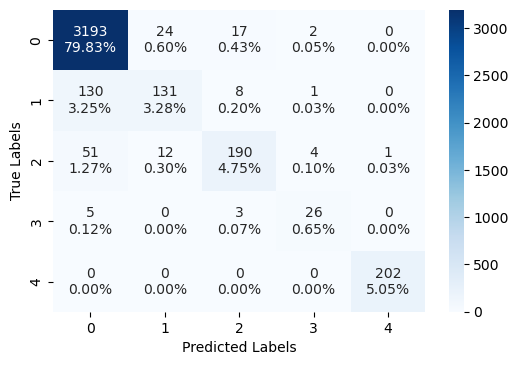

In [ ]:
import seaborn as sns

plt.figure(dpi=100)

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2, in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(5,5)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')